## APPLIED STATISTICS

### Turma 9DTSR

### Trabalho prático usando Python

### Análise de Correlação de Pearson e Teste Qui-Quadrado

Dataset Bike Sharing

Descrição: Os sistemas de compartilhamento de bicicletas são uma nova geração de aluguel de bicicletas tradicional, onde todo o processo de associação, locação e devolução tornou-se automático. Através destes sistemas, o usuário pode facilmente alugar uma bicicleta a partir de uma determinada posição e retornar em outra posição. Atualmente, existem cerca de 500 programas de compartilhamento de bicicletas em todo o mundo, compostos por mais de 500 mil bicicletas. Hoje, existe um grande interesse nesses sistemas devido ao seu importante papel no trânsito, questões ambientais e de saúde.

Fonte de dados: https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset


Dicionário de variáveis:
- instant: ID
- dteday: ID
- season: (1:winter, 2=springer, 3:summer, 4:fall)
- yr: year (0: 2011, 1:2012)
- mnth: ( 1 to 12)
- holiday (0=no;1=yes)
- weekday (day of the week)
- workingday (0=no;1=yes)
- weathersit (1: Clear, Few clouds , Partly cloudy, Partly cloudy; 2: Mist + Cloudy, Mist + Broken clouds,
              Mist + Few clouds, Mist;3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain +
              Scattered clouds;4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog)
- temp (Normalized temperature in Celsius). The values are derived via (t-t_min)/(t_max-t_min), t_min=-8,
        t_max=+39 (only in hourly scale)
- atemp (Normalized feeling temperature in Celsius). The values are derived via (t-t_min)/(t_max-t_min),
   t_min=-16, t_max=+50 (only in hourly scale)
- hum (Normalized humidity_. The values are divided to 100 (max)
- windspeed	Normalized wind speed. The values are divided to 67 (max)
- casual (count of casual users)
- registered (count of registered users)
- cnt (count of total rental bikes including both casual and registered)






In [41]:
# Importar as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import pearsonr
import statsmodels.api as sm


In [42]:
# Importar a base de dados
df=pd.read_csv('Bike_Sharing.csv')

In [43]:
# Visualizar os dados
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [44]:
# Verificar os formatos das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [45]:
# Análise descritiva
df.describe().round(2)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.00,731.00,731.0,731.00,731.00,731.0,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00
mean,366.00,2.50,0.5,6.52,0.03,3.0,0.68,1.40,0.50,0.47,0.63,0.19,848.18,3656.17,4504.35
std,211.17,1.11,0.5,3.45,0.17,2.0,0.47,0.54,0.18,0.16,0.14,0.08,686.62,1560.26,1937.21
min,1.00,1.00,0.0,1.00,0.00,0.0,0.00,1.00,0.06,0.08,0.00,0.02,2.00,20.00,22.00
25%,183.50,2.00,0.0,4.00,0.00,1.0,0.00,1.00,0.34,0.34,0.52,0.13,315.50,2497.00,3152.00
50%,366.00,3.00,1.0,7.00,0.00,3.0,1.00,1.00,0.50,0.49,0.63,0.18,713.00,3662.00,4548.00
75%,548.50,3.00,1.0,10.00,0.00,5.0,1.00,2.00,0.66,0.61,0.73,0.23,1096.00,4776.50,5956.00
max,731.00,4.00,1.0,12.00,1.00,6.0,1.00,3.00,0.86,0.84,0.97,0.51,3410.00,6946.00,8714.00


In [46]:
# Pre-processing
# Mudar o formato da variável quantitativa em qualitativa
df['season']= df['season'].astype(str)
df['mnth']= df['mnth'].astype(str)
df['weekday']= df['weekday'].astype(str)
df['weathersit']= df['weathersit'].astype(str)

In [47]:
# Verificar os nomes das variáveis
# informações dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    object 
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    object 
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    object 
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    object 
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 91.5+ KB


In [48]:
df.describe().round(2)

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.00,731.0,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00
mean,366.00,0.5,0.03,0.68,0.50,0.47,0.63,0.19,848.18,3656.17,4504.35
std,211.17,0.5,0.17,0.47,0.18,0.16,0.14,0.08,686.62,1560.26,1937.21
min,1.00,0.0,0.00,0.00,0.06,0.08,0.00,0.02,2.00,20.00,22.00
25%,183.50,0.0,0.00,0.00,0.34,0.34,0.52,0.13,315.50,2497.00,3152.00
50%,366.00,1.0,0.00,1.00,0.50,0.49,0.63,0.18,713.00,3662.00,4548.00
75%,548.50,1.0,0.00,1.00,0.66,0.61,0.73,0.23,1096.00,4776.50,5956.00
max,731.00,1.0,1.00,1.00,0.86,0.84,0.97,0.51,3410.00,6946.00,8714.00


In [49]:
# modificando os nomes das colunas
df.columns = ['ID', 'data', 'estacao','ano','mes', 'feriado','dia_semana','dia_util','clima', 'temperatura','sensacao_termica',
             'umidade','vel_vento','casual', 'registrada', 'total']

In [50]:
# Verificar os nomes das variáveis
# informações dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                731 non-null    int64  
 1   data              731 non-null    object 
 2   estacao           731 non-null    object 
 3   ano               731 non-null    int64  
 4   mes               731 non-null    object 
 5   feriado           731 non-null    int64  
 6   dia_semana        731 non-null    object 
 7   dia_util          731 non-null    int64  
 8   clima             731 non-null    object 
 9   temperatura       731 non-null    float64
 10  sensacao_termica  731 non-null    float64
 11  umidade           731 non-null    float64
 12  vel_vento         731 non-null    float64
 13  casual            731 non-null    int64  
 14  registrada        731 non-null    int64  
 15  total             731 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory us

# Separar as variáveis quantitativas das qualitativas

In [51]:
# Selecionar as variáveis quantitativas
var_num = ['temperatura','sensacao_termica','umidade','vel_vento', 'total']

In [52]:
# Selecionar as variáveis qualitativas
var_cat =['estacao','ano','mes', 'feriado','dia_semana','dia_util','clima']

# Análise descritiva univariada

In [53]:
# Análise descritiva: medidas resumo
df[var_num].describe().round(2)

,temperatura,sensacao_termica,umidade,vel_vento,total
count,731.00,731.00,731.00,731.00,731.00
mean,0.50,0.47,0.63,0.19,4504.35
std,0.18,0.16,0.14,0.08,1937.21
min,0.06,0.08,0.00,0.02,22.00
25%,0.34,0.34,0.52,0.13,3152.00
50%,0.50,0.49,0.63,0.18,4548.00
75%,0.66,0.61,0.73,0.23,5956.00
max,0.86,0.84,0.97,0.51,8714.00


/var/folders/jg/ltscjj4d0cn9rp9tg94kl1kr0000gn/T/ipykernel_76665/1682537765.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, ax=ax, color="blue", kde=False)


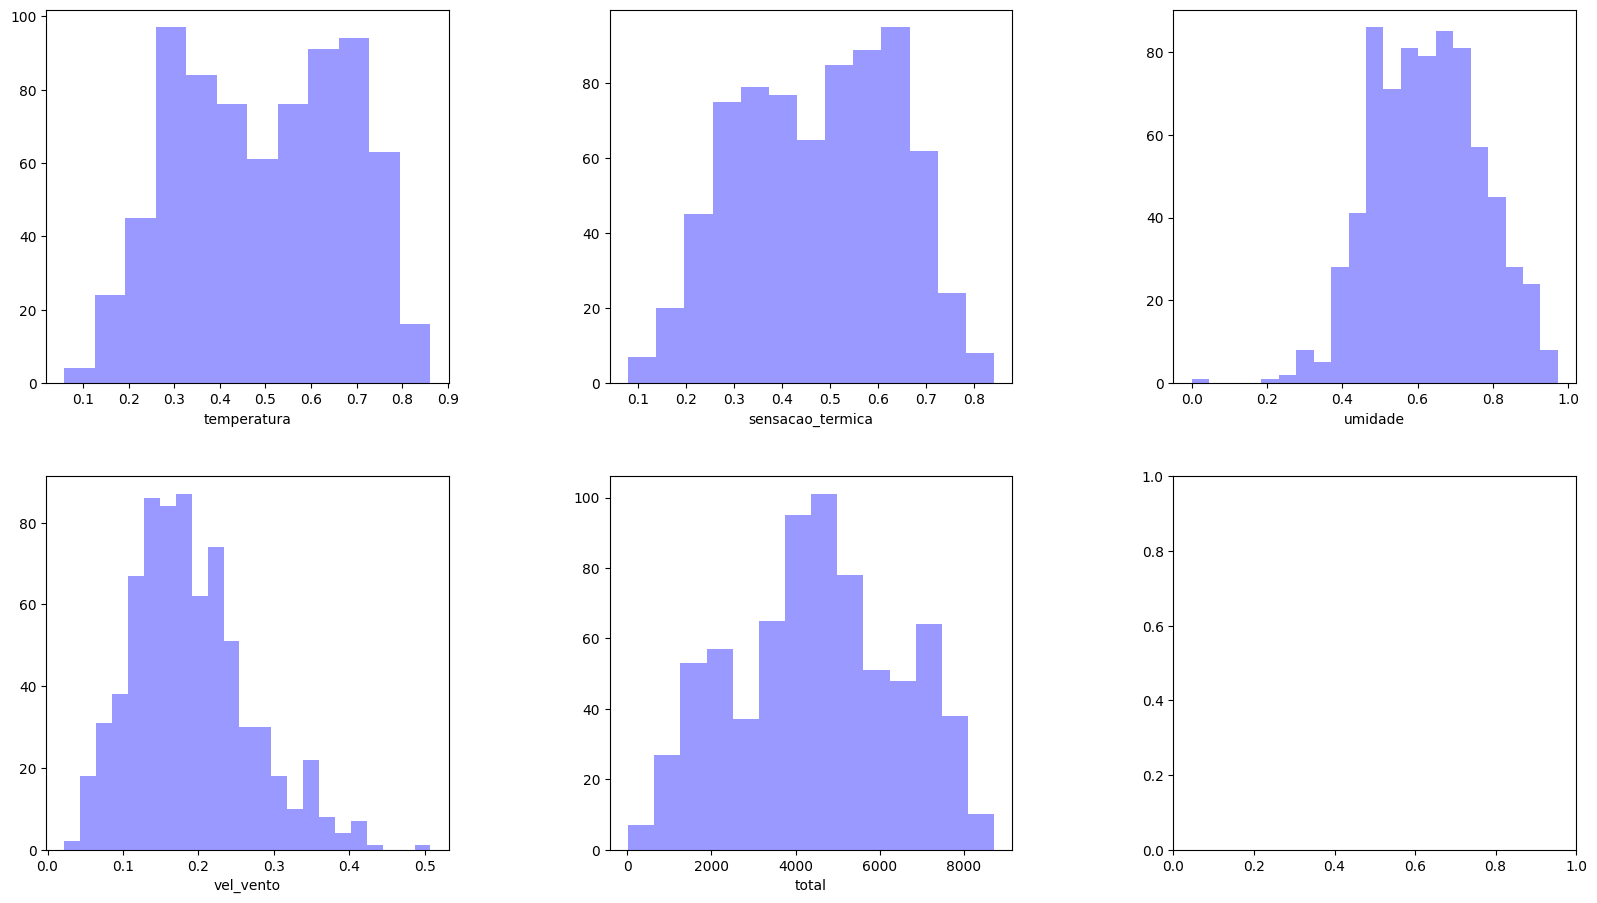

In [54]:
# Análise exploratória dos dados usando o gráfico histograma
features = var_num
fig,axs=plt.subplots(nrows=2, ncols=3, figsize=(18,10))
for col, ax in zip(features[0:], axs.ravel()):
    x=df.loc[:, col]
    sns.distplot(x, ax=ax, color="blue", kde=False)
    plt.subplots_adjust(top=0.92,bottom=0.08, left=0.10,right=0.95,hspace=0.25,wspace=0.4)

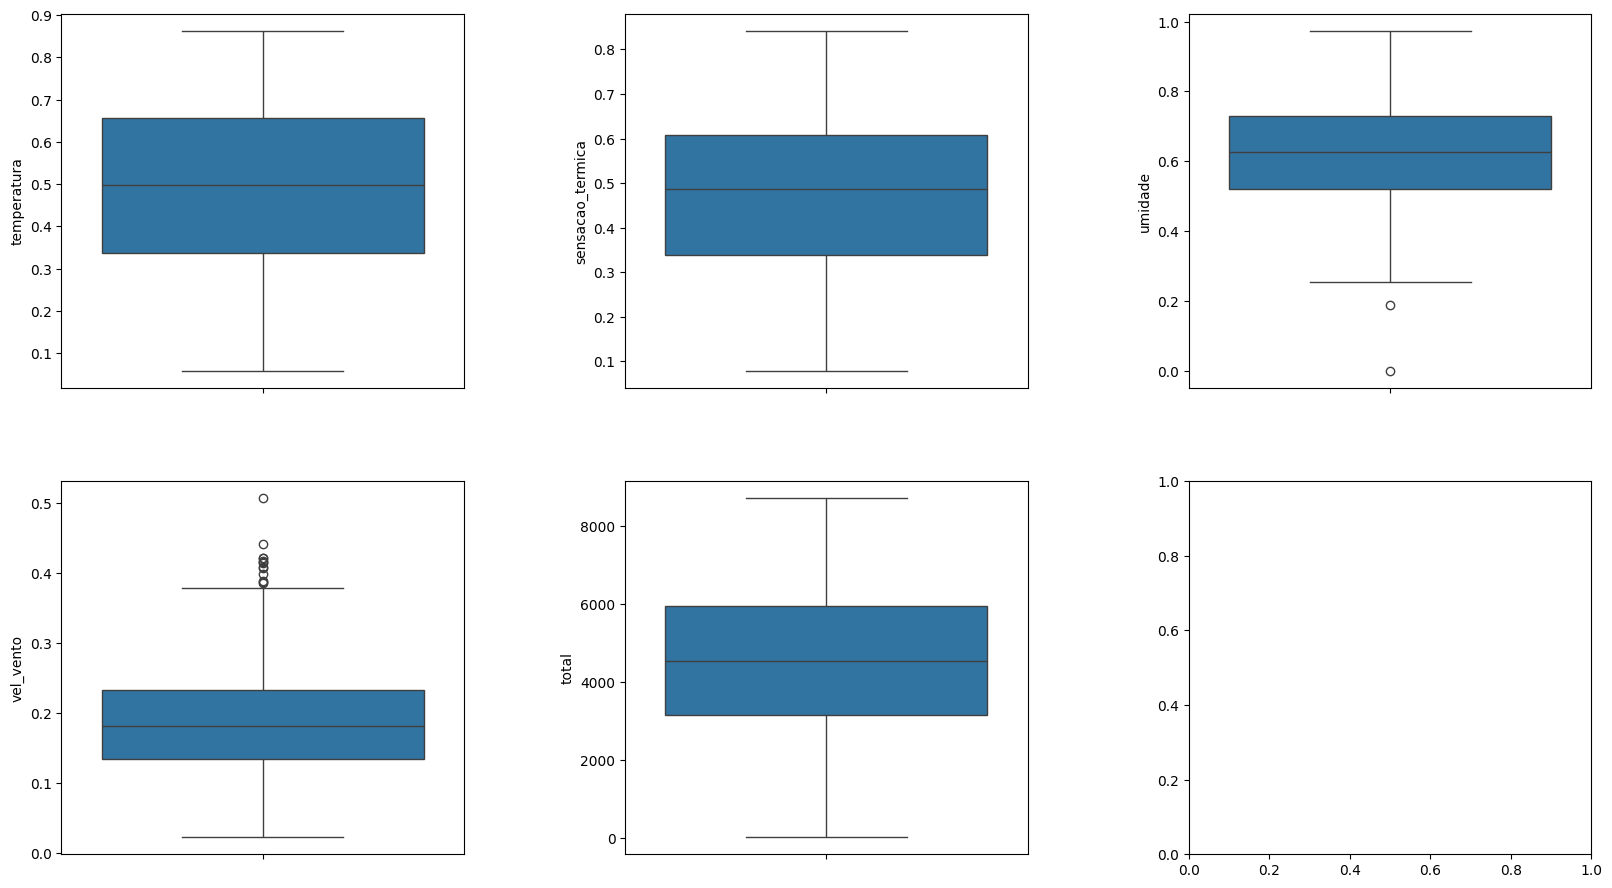

In [55]:
# Análise exploratória dos dados usando o gráfico Box Plot
features = var_num
fig,axs=plt.subplots(nrows=2, ncols=3, figsize=(18,10))
for col, ax in zip(features[0:], axs.ravel()):
    x=df.loc[:, col]
    sns.boxplot(x, ax=ax, orient='v')
    plt.subplots_adjust(top=0.92,bottom=0.08, left=0.10,right=0.95,hspace=0.25,wspace=0.4)

/var/folders/jg/ltscjj4d0cn9rp9tg94kl1kr0000gn/T/ipykernel_76665/463129718.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='estacao', data=df, palette=palette)


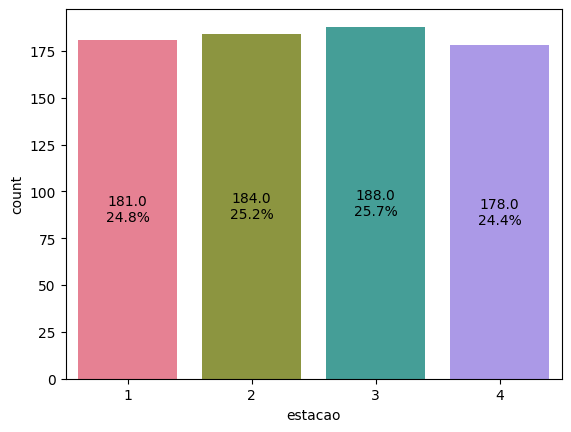

In [56]:
# Análise exploratória dos dados usando o gráfico de barras
palette = sns.color_palette("husl", len(df['estacao'].unique()))
ax = sns.countplot(x='estacao', data=df, palette=palette)

# Adicionando rótulos de contagem e percentual
total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() / 2., f'{count}\n{percentage}',
            ha='center', va='center')

# Exibindo o gráfico
plt.show()

/var/folders/jg/ltscjj4d0cn9rp9tg94kl1kr0000gn/T/ipykernel_76665/247047204.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='ano', data=df, palette=palette)


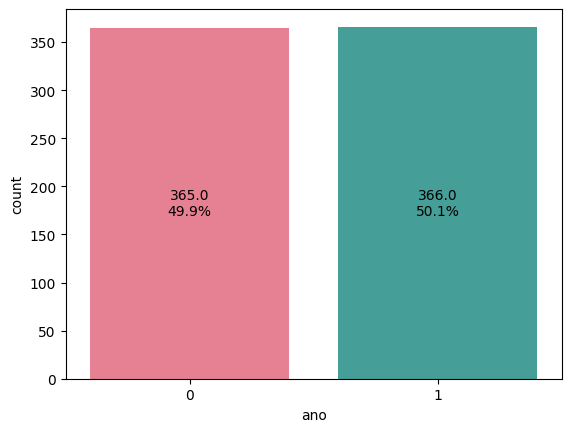

In [57]:
# Análise exploratória dos dados usando o gráfico de barras
palette = sns.color_palette("husl", len(df['ano'].unique()))
ax = sns.countplot(x='ano', data=df, palette=palette)

# Adicionando rótulos de contagem e percentual
total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() / 2., f'{count}\n{percentage}',
            ha='center', va='center')

# Exibindo o gráfico
plt.show()

/var/folders/jg/ltscjj4d0cn9rp9tg94kl1kr0000gn/T/ipykernel_76665/1556220182.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='mes', data=df, palette=palette)


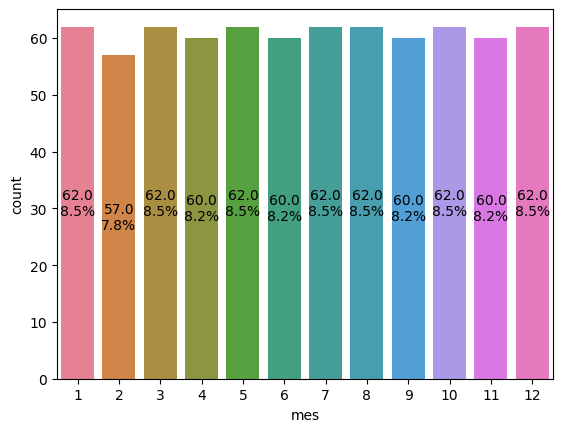

In [58]:
# Análise exploratória dos dados usando o gráfico de barras
palette = sns.color_palette("husl", len(df['mes'].unique()))
ax = sns.countplot(x='mes', data=df, palette=palette)

# Adicionando rótulos de contagem e percentual
total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() / 2., f'{count}\n{percentage}',
            ha='center', va='center')

# Exibindo o gráfico
plt.show()

/var/folders/jg/ltscjj4d0cn9rp9tg94kl1kr0000gn/T/ipykernel_76665/1861116846.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='feriado', data=df, palette=palette)


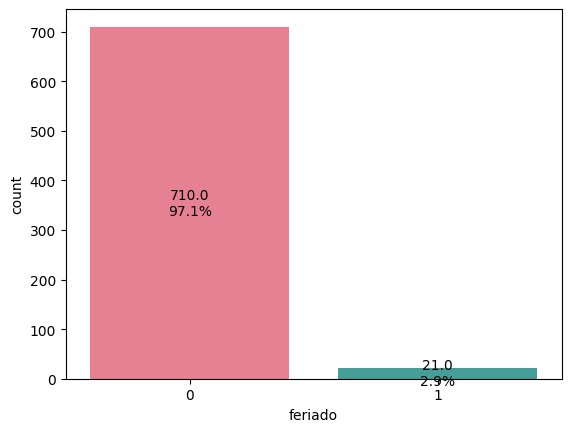

In [59]:
# Análise exploratória dos dados usando o gráfico de barras
palette = sns.color_palette("husl", len(df['feriado'].unique()))
ax = sns.countplot(x='feriado', data=df, palette=palette)

# Adicionando rótulos de contagem e percentual
total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() / 2., f'{count}\n{percentage}',
            ha='center', va='center')

# Exibindo o gráfico
plt.show()

/var/folders/jg/ltscjj4d0cn9rp9tg94kl1kr0000gn/T/ipykernel_76665/1004154039.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='dia_semana', data=df, palette=palette)


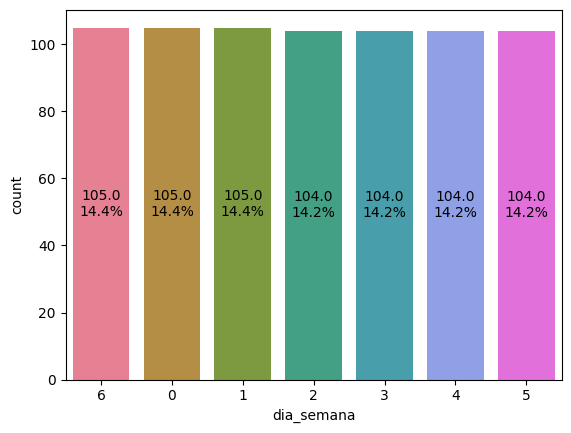

In [60]:
# Análise exploratória dos dados usando o gráfico de barras
palette = sns.color_palette("husl", len(df['dia_semana'].unique()))
ax = sns.countplot(x='dia_semana', data=df, palette=palette)

# Adicionando rótulos de contagem e percentual
total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() / 2., f'{count}\n{percentage}',
            ha='center', va='center')

# Exibindo o gráfico
plt.show()

/var/folders/jg/ltscjj4d0cn9rp9tg94kl1kr0000gn/T/ipykernel_76665/2465853571.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='dia_semana', data=df, palette=palette)
/var/folders/jg/ltscjj4d0cn9rp9tg94kl1kr0000gn/T/ipykernel_76665/2465853571.py:3: UserWarning: 
The palette list has fewer values (2) than needed (7) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(x='dia_semana', data=df, palette=palette)


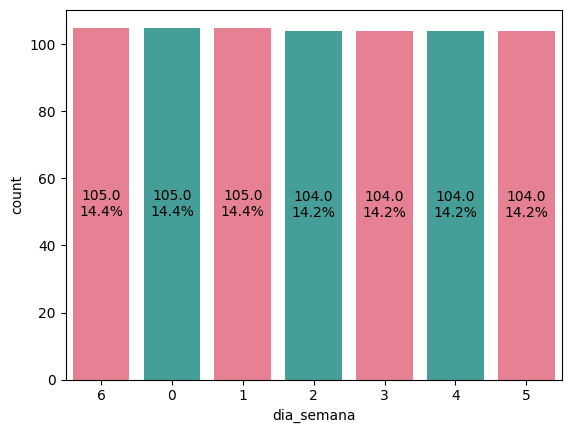

In [61]:
# Análise exploratória dos dados usando o gráfico de barras
palette = sns.color_palette("husl", len(df['dia_util'].unique()))
ax = sns.countplot(x='dia_semana', data=df, palette=palette)

# Adicionando rótulos de contagem e percentual
total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() / 2., f'{count}\n{percentage}',
            ha='center', va='center')

# Exibindo o gráfico
plt.show()

/var/folders/jg/ltscjj4d0cn9rp9tg94kl1kr0000gn/T/ipykernel_76665/2128746503.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='clima', data=df, palette=palette)


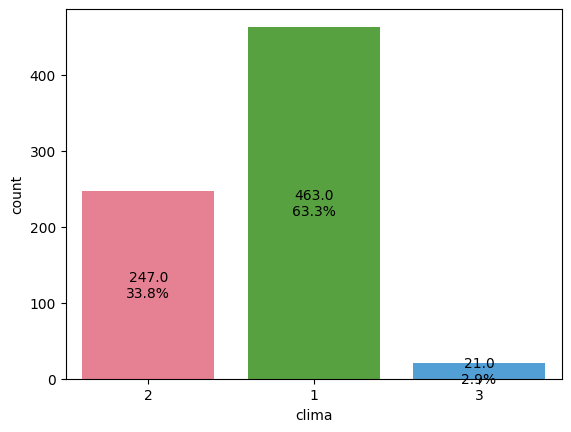

In [62]:
# Análise exploratória dos dados usando o gráfico de barras
palette = sns.color_palette("husl", len(df['clima'].unique()))
ax = sns.countplot(x='clima', data=df, palette=palette)

# Adicionando rótulos de contagem e percentual
total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() / 2., f'{count}\n{percentage}',
            ha='center', va='center')

# Exibindo o gráfico
plt.show()

# Análise descritiva bivariada - duas variáveis quantitativas

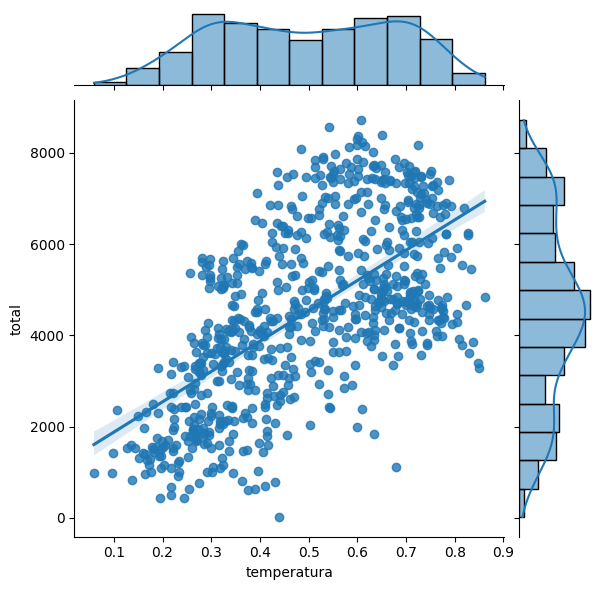

In [63]:
# Gráfico de dispersão
sns.jointplot(x='temperatura', y='total', data=df, kind='reg')


In [64]:
# Correlação entre CNT e Temperatura
print('Correlação de Pearson entre o total de bikes alugadas e temperatura')
pearsonr(df['temperatura'], df['total'])

Correlação de Pearson entre o total de bikes alugadas e temperatura


PearsonRResult(statistic=np.float64(0.6274940090334921), pvalue=np.float64(2.8106223975893466e-81))

## Correlação de Pearson - duas variáveis quantitativas

### Teste de hipótese
### H0: correlação = 0
### H1: correlação <> 0

### erro decisão: 0,05 ou 5% --> nível de significância do teste de hipótese
### Critério de decisão:
### p-valor < critério de decisão --> rejeito H0
### p-valor >= critério de decisão --> não rejeito H0

### conclusão: p-valor < 0,05 --> logo existe correlação entre as duas variáveis

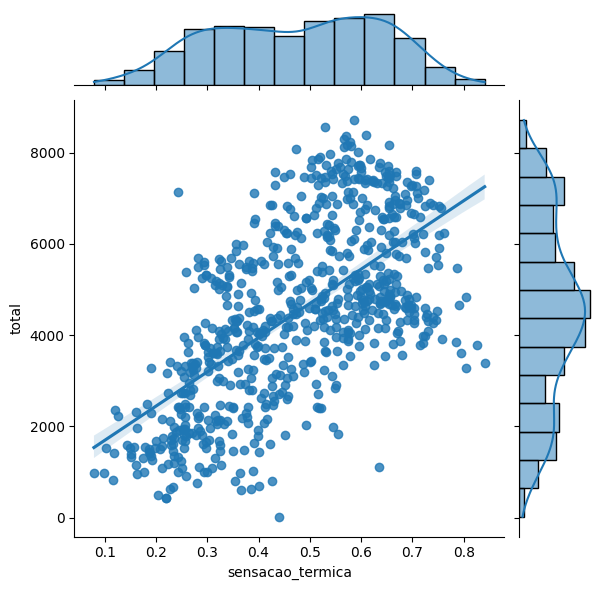

In [65]:
# Gráfico de dispersão
sns.jointplot(x='sensacao_termica', y='total', data=df, kind='reg')


In [66]:
# Correlação entre CNT e Sensação térmica
print('Correlação de Pearson entre o total de bikes alugadas e sensação térmica')
pearsonr(df['sensacao_termica'], df['total'])

Correlação de Pearson entre o total de bikes alugadas e sensação térmica


PearsonRResult(statistic=np.float64(0.6310656998491813), pvalue=np.float64(1.8545041252837507e-82))

### Interpretação do teste de hipótese

correlação = 0.06274

p-valor = 2.8106223975907754e-81 = 0,000000000 < 0,000

Conclusão: p-valor < 0,05 --> rejeito H0. Logo, existe correlação entre sensação térmica e total com erro de 5%

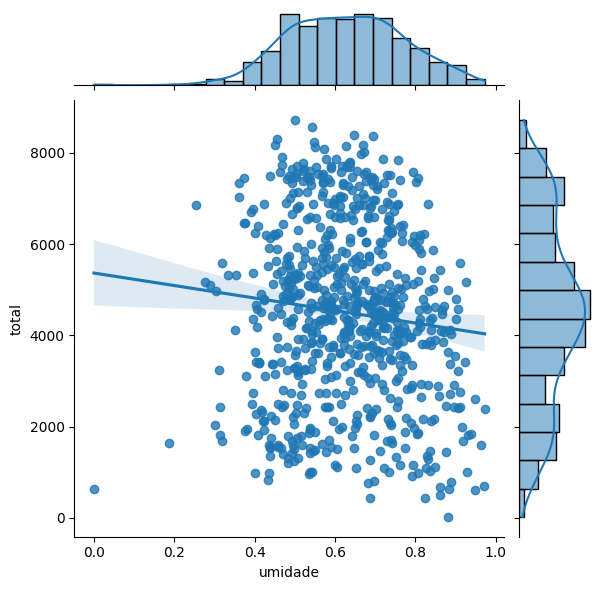

In [67]:
# Gráfico de dispersão entre CNT e Umidade
sns.jointplot(x='umidade', y='total', data=df, kind='reg')

In [68]:
# Correlação entre CNT e umidade
print('Correlação de Pearson entre o total de bikes alugadas e umidade')
pearsonr(df['umidade'], df['total'])

Correlação de Pearson entre o total de bikes alugadas e umidade


PearsonRResult(statistic=np.float64(-0.10065856213715524), pvalue=np.float64(0.006454143325437122))

### Interpretação do teste de correlação

correlação = -0,10

p-valor = 0.0064

critério de decisão: p-valor < 0,05 --> existe correlação negativa, porém fraca.

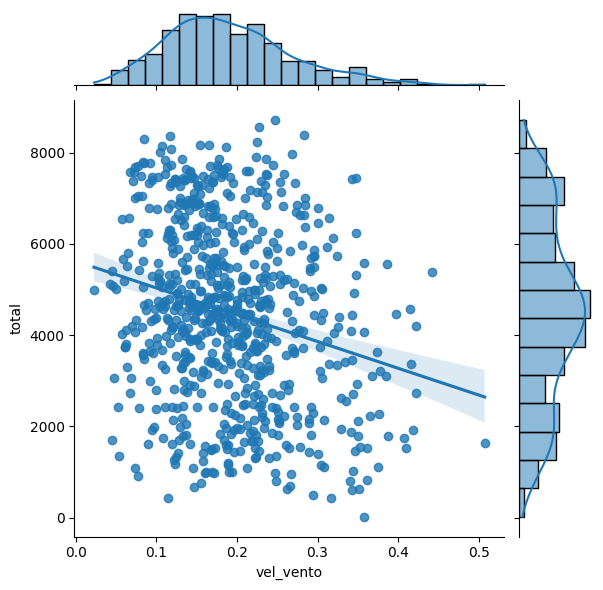

In [69]:
# Gráfico de dispersão entre CNT e velocidade do vento
sns.jointplot(x='vel_vento', y='total', data=df, kind='reg')

In [70]:
#  Correlação entre CNT e Velocidade do vento
print('Correlação de Pearson entre o total de bikes alugadas e velocidade do vento')
pearsonr(df['vel_vento'], df['total'])

Correlação de Pearson entre o total de bikes alugadas e velocidade do vento


PearsonRResult(statistic=np.float64(-0.23454499742167), pvalue=np.float64(1.3599586778864978e-10))

In [71]:
# Matriz de Correlação de Pearson
df[var_num].corr(method='pearson')

,temperatura,sensacao_termica,umidade,vel_vento,total
temperatura,1.000000,0.991702,0.126963,-0.157944,0.627494
sensacao_termica,0.991702,1.000000,0.139988,-0.183643,0.631066
umidade,0.126963,0.139988,1.000000,-0.248489,-0.100659
vel_vento,-0.157944,-0.183643,-0.248489,1.000000,-0.234545
total,0.627494,0.631066,-0.100659,-0.234545,1.000000


<Axes: >

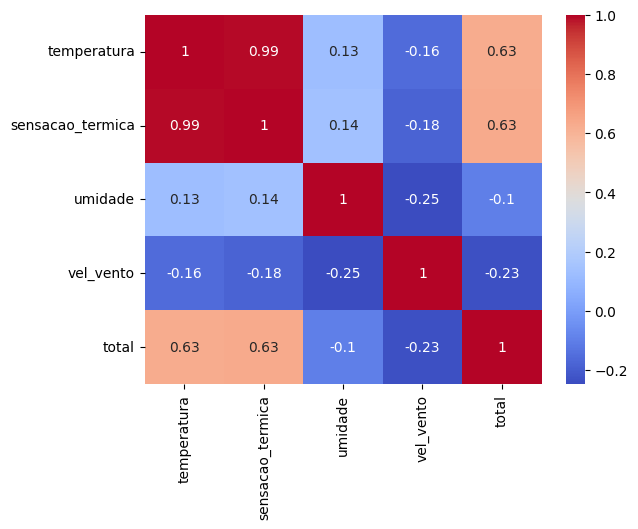

In [72]:
# Matriz de correlação
sns.heatmap(df[var_num].corr(), cmap='coolwarm', annot = True)

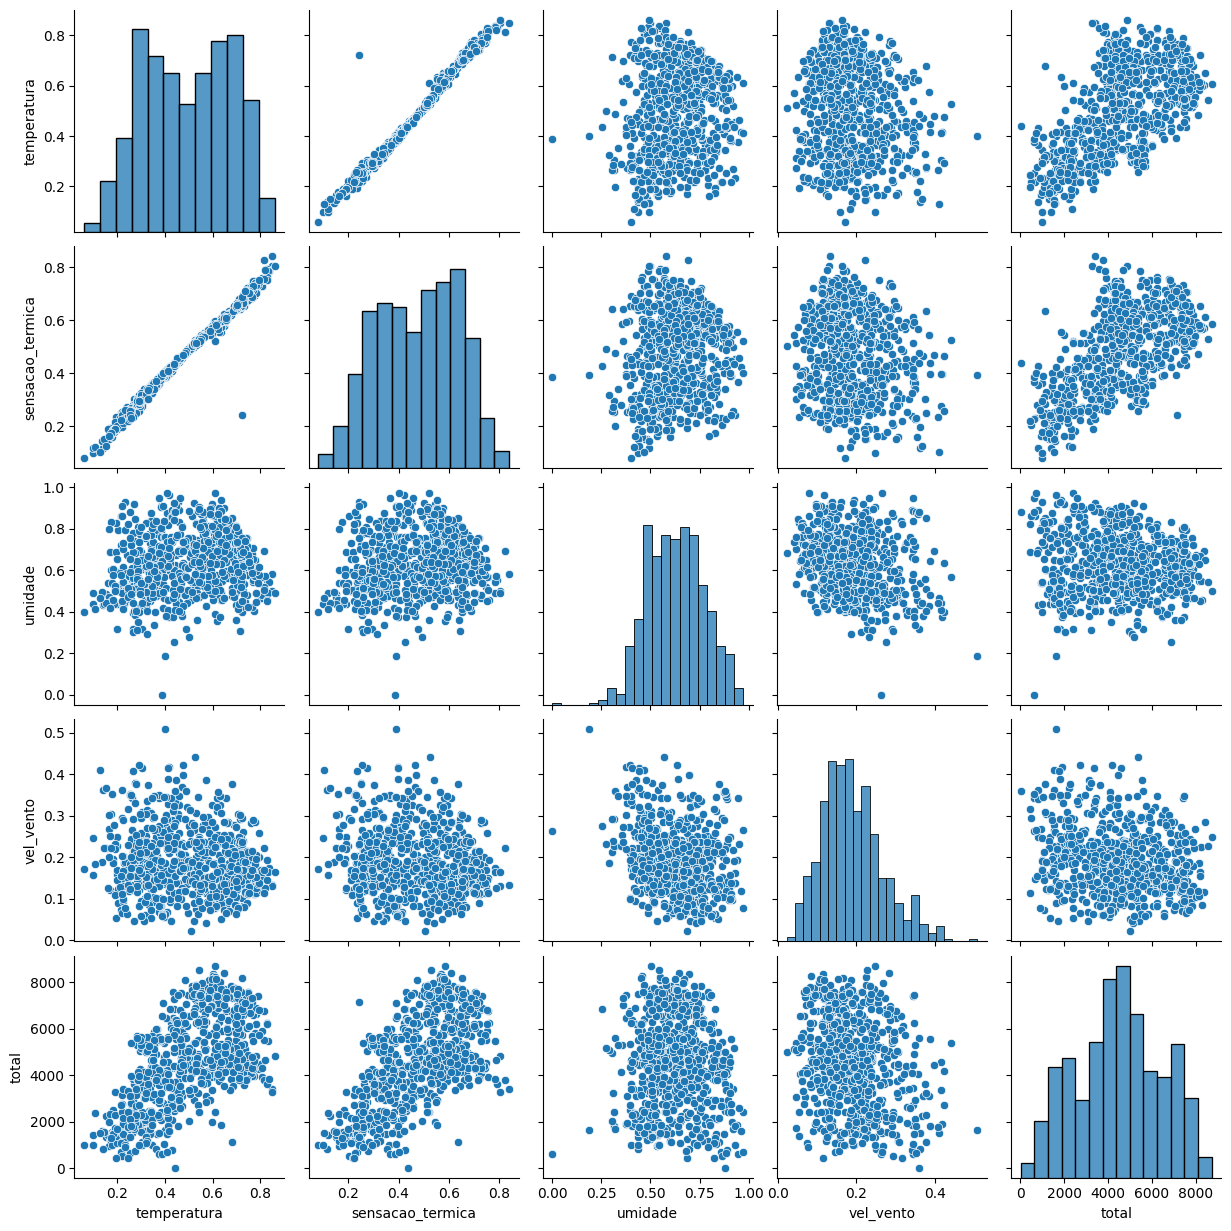

In [73]:
# Análise exploratória dos dados
#sns.pairplot()
sns.pairplot(df[var_num])

# Análise bivariada - variável quantitatita versus variável qualitativa

/var/folders/jg/ltscjj4d0cn9rp9tg94kl1kr0000gn/T/ipykernel_76665/1637114278.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='estacao', y='total', data=df, palette = 'rainbow')


<Axes: xlabel='estacao', ylabel='total'>

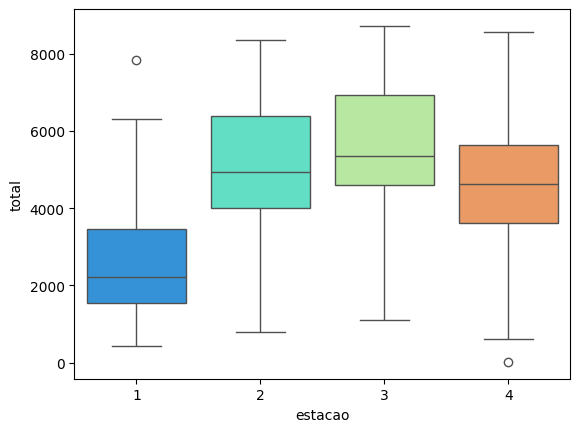

In [74]:
# Análise quantitativa versus qualitativa
# Variáveis qualitativas
# Identificar se há associação entre CNT ( variável quantitativa) e Estação do ano (variável qualitativa)
# Box Plot
sns.boxplot(x='estacao', y='total', data=df, palette = 'rainbow')

/var/folders/jg/ltscjj4d0cn9rp9tg94kl1kr0000gn/T/ipykernel_76665/1355189562.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='mes', y='total', data=df, palette = 'rainbow')


<Axes: xlabel='mes', ylabel='total'>

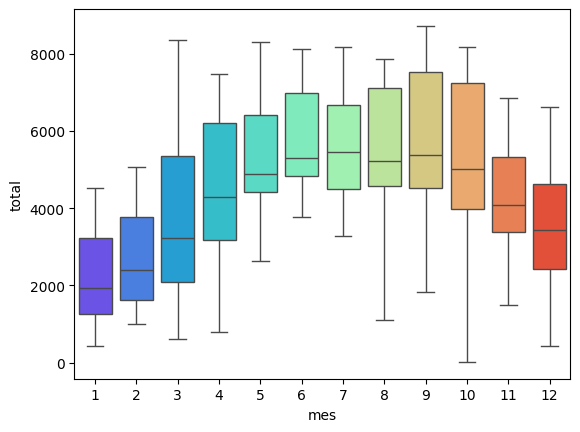

In [75]:
# Box Plot total versys mês
sns.boxplot(x='mes', y='total', data=df, palette = 'rainbow')

/var/folders/jg/ltscjj4d0cn9rp9tg94kl1kr0000gn/T/ipykernel_76665/3324575106.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='clima', y='total', data=df, palette = 'rainbow')


<Axes: xlabel='clima', ylabel='total'>

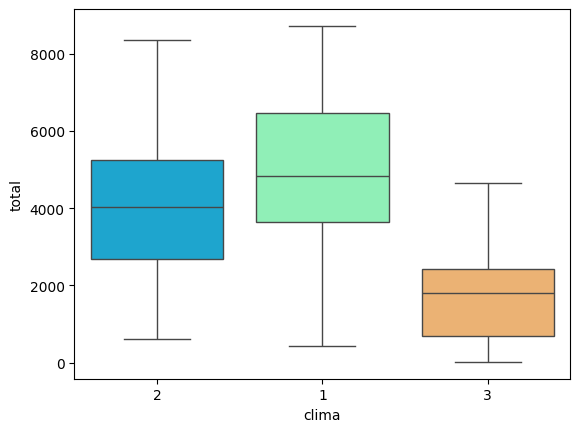

In [76]:
# Box Plot total versys clima
sns.boxplot(x='clima', y='total', data=df, palette = 'rainbow')

/var/folders/jg/ltscjj4d0cn9rp9tg94kl1kr0000gn/T/ipykernel_76665/2831139694.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='dia_semana', y='total', data=df, palette = 'rainbow')


<Axes: xlabel='dia_semana', ylabel='total'>

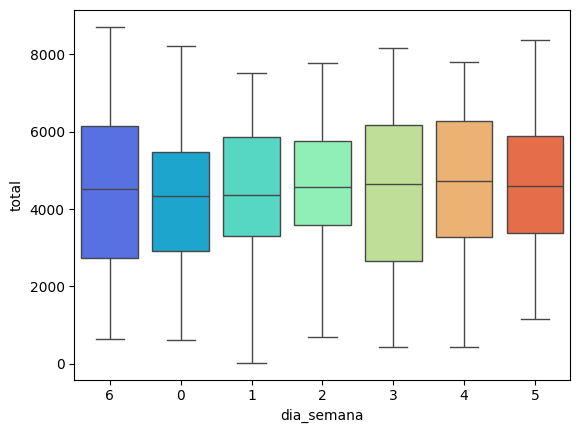

In [77]:
# Box Plot total versys dia da semana
sns.boxplot(x='dia_semana', y='total', data=df, palette = 'rainbow')

/var/folders/jg/ltscjj4d0cn9rp9tg94kl1kr0000gn/T/ipykernel_76665/1184183231.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='feriado', y='total', data=df, palette = 'rainbow')


<Axes: xlabel='feriado', ylabel='total'>

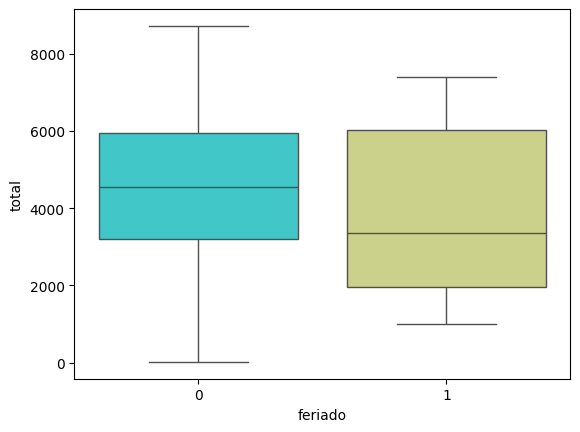

In [78]:
# Box Plot total versys feriado
sns.boxplot(x='feriado', y='total', data=df, palette = 'rainbow')

/var/folders/jg/ltscjj4d0cn9rp9tg94kl1kr0000gn/T/ipykernel_76665/3295209865.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='dia_util', y='total', data=df, palette = 'rainbow')


<Axes: xlabel='dia_util', ylabel='total'>

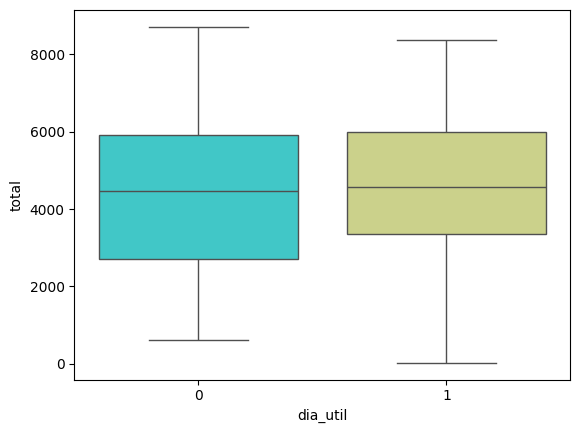

In [79]:
# Box Plot total versys dia útil
sns.boxplot(x='dia_util', y='total', data=df, palette = 'rainbow')

### Teste qui-quadrado é utilizado para descobrir associação entre duas variáveis qualitativas
### transformar a variável total de bikes alugadas em qualitativa --> faixa cnt (qualitativa ordinal) vs estação do ano (qualitativa ordinal)
### criar a faixa_cnt você usar os quartis

/var/folders/jg/ltscjj4d0cn9rp9tg94kl1kr0000gn/T/ipykernel_76665/1637114278.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='estacao', y='total', data=df, palette = 'rainbow')


<Axes: xlabel='estacao', ylabel='total'>

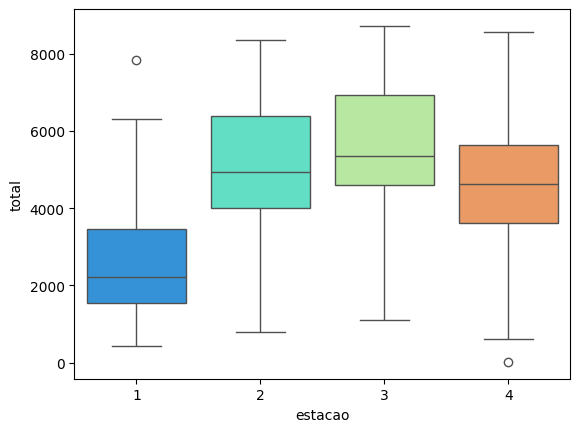

In [80]:
# Análise quantitativa versus qualitativa
# Variáveis qualitativas
# Identificar se há associação entre CNT ( variável quantitativa) e Estação do ano (variável qualitativa)
# Box Plot
sns.boxplot(x='estacao', y='total', data=df, palette = 'rainbow')

In [96]:
# Criar os quartis
minimo = min(df['total'])
Q1 =  np.percentile(df['total'], 25)
Q2 =  np.percentile(df['total'], 50)
Q3 =  np.percentile(df['total'], 75)
maximo = max(df['total'])
print(minimo, Q1, Q2, Q3, maximo)


22 3152.0 4548.0 5956.0 8714


In [97]:
# Criar a variável faixa de quantidade de bikes alugadas
df.loc[(df.total >= minimo) & (df.total <= Q1), 'fx_total']='22 a 3152'
df.loc[(df.total > Q1) & (df.total <= Q2), 'fx_total']='3152 a 4548'
df.loc[(df.total >  Q2)  & (df.total <=Q3), 'fx_total']='4548 a 5956'
df.loc[(df.total >  Q3) & (df.total <= maximo), 'fx_total']='5956 a 8714'

In [98]:
# Tabela bivariada - números absolutos
cross_tab = pd.crosstab(index=df['fx_total'], columns=df['estacao'],margins=True)

In [99]:
# Tabela bivariada - proporção
cross_tab_prop = pd.crosstab(index=df['fx_total'],
                             columns=df['estacao'],
                             normalize="index",margins=True,
                             margins_name='All')
cross_tab_prop

estacao,1,2,3,4
fx_total,,,,
22 a 3152,0.666667,0.153005,0.021858,0.158470
3152 a 4548,0.234973,0.234973,0.224044,0.306011
4548 a 5956,0.060440,0.280220,0.351648,0.307692
5956 a 8714,0.027322,0.338798,0.431694,0.202186
All,0.247606,0.251710,0.257182,0.243502


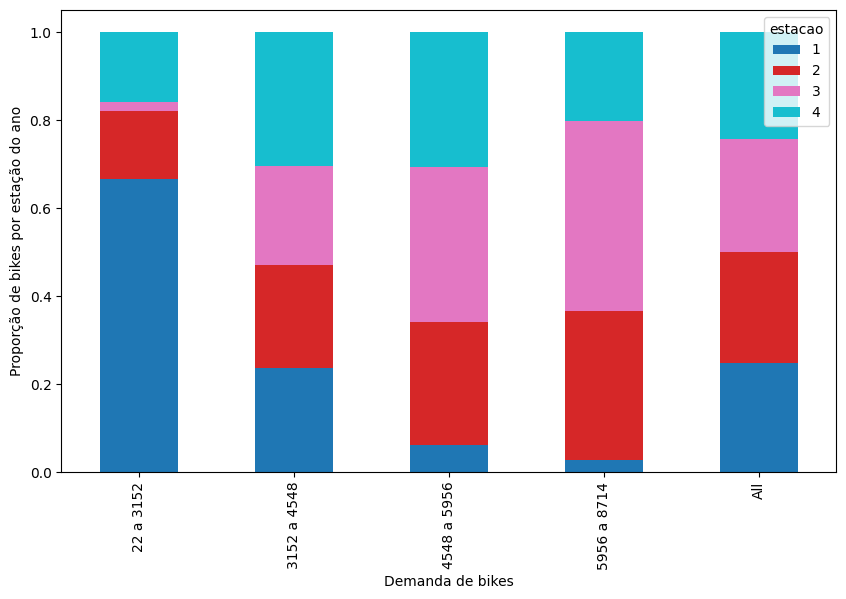

In [85]:
# gráfico 100% empilhado
# https://towardsdatascience.com/100-stacked-charts-in-python-6ca3e1962d2b
cross_tab_prop.plot(kind='bar',
                    stacked=True,
                    colormap='tab10',
                    figsize=(10, 6))

plt.xlabel("Demanda de bikes")
plt.ylabel("Proporção de bikes por estação do ano")
plt.show()

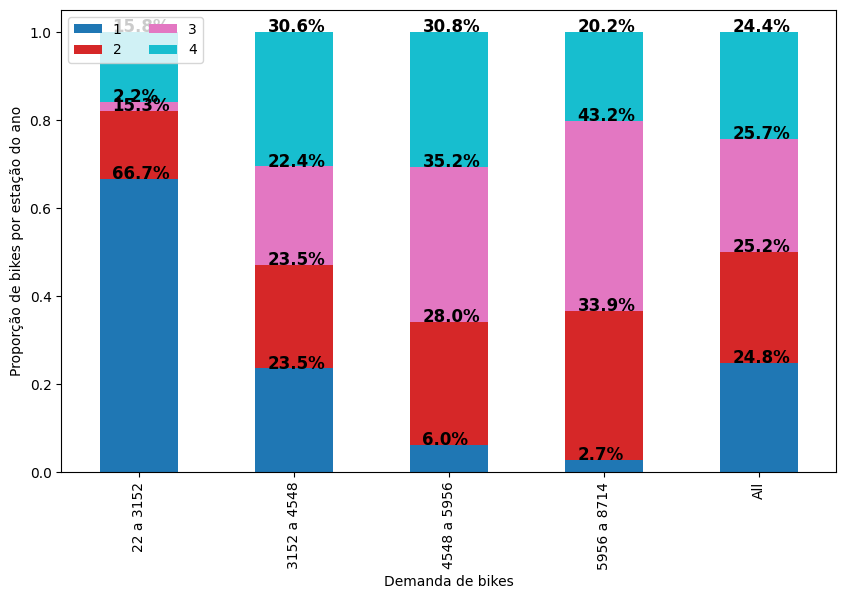

In [86]:
# gráfico 100% empilhado com label

cross_tab_prop.plot(kind='bar',
                    stacked=True,
                    colormap='tab10',
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Demanda de bikes")
plt.ylabel("Proporção de bikes por estação do ano")


for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):

        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%',
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

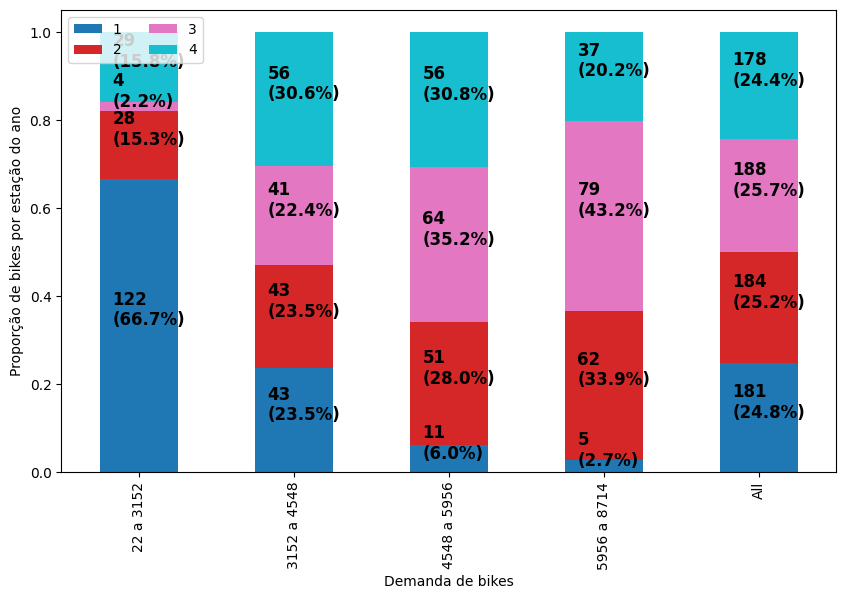

In [87]:
# gráfico 100% empilhado com label

cross_tab_prop.plot(kind='bar',
                        stacked=True,
                        colormap='tab10',
                        figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Demanda de bikes")
plt.ylabel("Proporção de bikes por estação do ano")


for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_prop.loc[x],
                                          cross_tab.loc[x],
                                          cross_tab_prop.loc[x].cumsum()):

        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)',
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

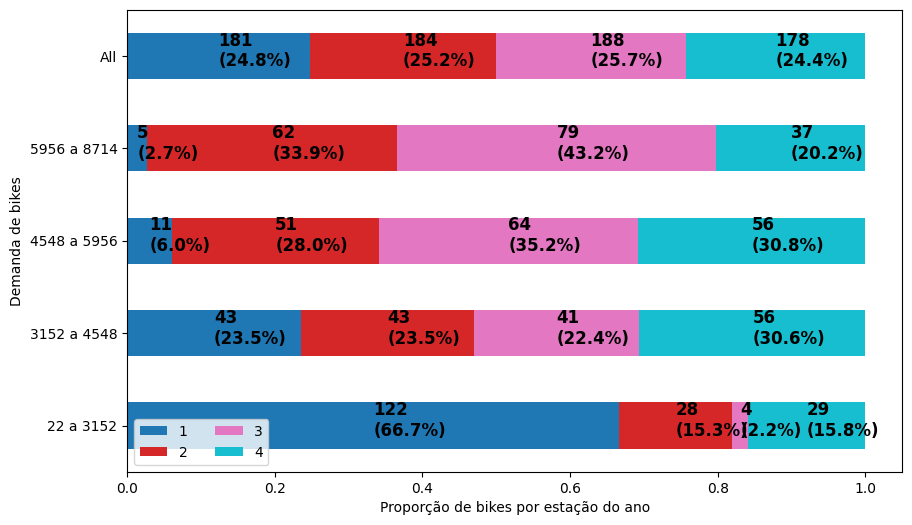

In [88]:
# gráfico 100% empilhado com label

cross_tab_prop.plot(kind='barh',
                        stacked=True,
                        colormap='tab10',
                        figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("Proporção de bikes por estação do ano")
plt.ylabel("Demanda de bikes")


for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_prop.loc[x],
                                          cross_tab.loc[x],
                                          cross_tab_prop.loc[x].cumsum()):

        plt.text(x=(y_loc - proportion) + (proportion / 2),
                 y=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)',
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

### Teste Qui-Quadrado - duas variáveis qualitativas

In [89]:
# Teste qui-quadrado entre total e estação do ano
# Existe associação?
table1 = pd.crosstab(df.fx_total,df.estacao)
table1

estacao,1,2,3,4
fx_total,,,,
22 a 3152,122,28,4,29
3152 a 4548,43,43,41,56
4548 a 5956,11,51,64,56
5956 a 8714,5,62,79,37


In [100]:
# importar as bibliotecas do teste qui-quadrado
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [101]:
# estatísticas stat = valor do qui-quadrado, p= p-value, dof=graus de liberdade, expected = valores esperados
stat, p, dof, expected = chi2_contingency(table1)


In [102]:
# Interpretação do teste qui-quadrado
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=9
[[45.3119015  46.0629275  47.06429549 44.56087551]
 [45.3119015  46.0629275  47.06429549 44.56087551]
 [45.06429549 45.81121751 46.80711354 44.31737346]
 [45.3119015  46.0629275  47.06429549 44.56087551]]
probability=0.950, critical=16.919, stat=285.814
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


In [93]:
# Teste qui-quadrado entre total e dia da semana
# Existe associação?
table2 = pd.crosstab(df.fx_total,df.dia_semana)
table2

dia_semana,0,1,2,3,4,5,6
fx_total,,,,,,,
22 a 3152,29,25,24,29,25,20,31
3152 a 4548,27,34,27,21,23,29,22
4548 a 5956,27,21,30,27,25,29,23
5956 a 8714,22,25,23,27,31,26,29


In [94]:
# estatísticas stat = valor do qui-quadrado, p= p-value, dof=graus de liberdade, expected = valores esperados
stat, p, dof, expected = chi2_contingency(table2)


In [95]:
# Interpretação do teste qui-quadrado
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=18
[[26.28590971 26.28590971 26.03556772 26.03556772 26.03556772 26.03556772
  26.28590971]
 [26.28590971 26.28590971 26.03556772 26.03556772 26.03556772 26.03556772
  26.28590971]
 [26.14227086 26.14227086 25.89329685 25.89329685 25.89329685 25.89329685
  26.14227086]
 [26.28590971 26.28590971 26.03556772 26.03556772 26.03556772 26.03556772
  26.28590971]]
probability=0.950, critical=28.869, stat=12.707
Independent (fail to reject H0)
significance=0.050, p=0.809
Independent (fail to reject H0)


/var/folders/jg/ltscjj4d0cn9rp9tg94kl1kr0000gn/T/ipykernel_76665/112796038.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='dia_semana', y='total', data=df, palette = 'rainbow')


<Axes: xlabel='dia_semana', ylabel='total'>

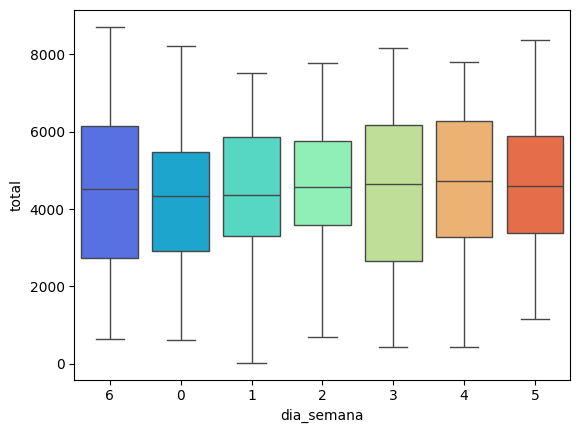

In [103]:
# Análise quantitativa versus qualitativa
# Variáveis qualitativas
# Identificar se há associação entre CNT ( variável quantitativa) e Estação do ano (variável qualitativa)
# Box Plot
sns.boxplot(x='dia_semana', y='total', data=df, palette = 'rainbow')

In [104]:
# Tabela bivariada - proporção
cross_tab_prop = pd.crosstab(index=df['fx_total'],
                             columns=df['dia_semana'],
                             normalize="index",margins=True,
                             margins_name='All')
cross_tab_prop

dia_semana,0,1,2,3,4,5,6
fx_total,,,,,,,
22 a 3152,0.158470,0.136612,0.131148,0.158470,0.136612,0.109290,0.169399
3152 a 4548,0.147541,0.185792,0.147541,0.114754,0.125683,0.158470,0.120219
4548 a 5956,0.148352,0.115385,0.164835,0.148352,0.137363,0.159341,0.126374
5956 a 8714,0.120219,0.136612,0.125683,0.147541,0.169399,0.142077,0.158470
All,0.143639,0.143639,0.142271,0.142271,0.142271,0.142271,0.143639


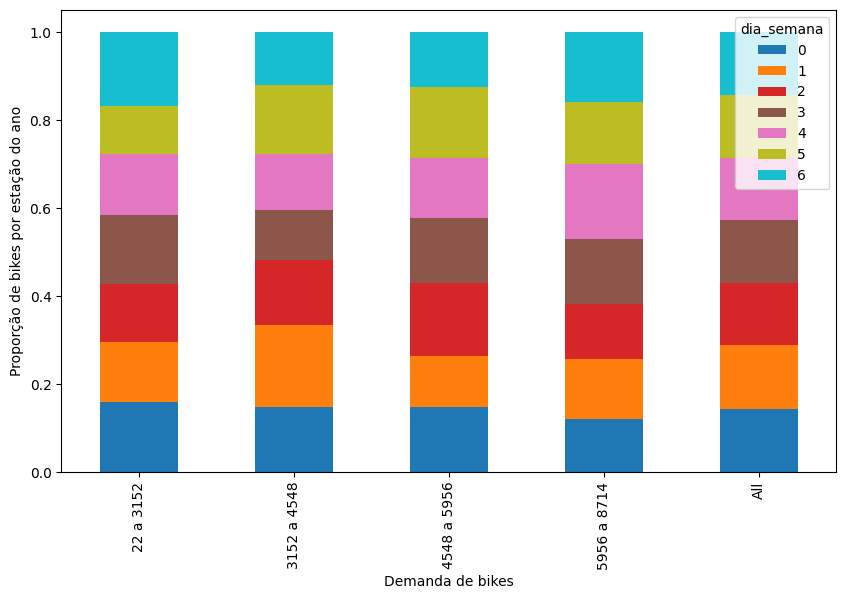

In [105]:
# gráfico 100% empilhado
# https://towardsdatascience.com/100-stacked-charts-in-python-6ca3e1962d2b
cross_tab_prop.plot(kind='bar',
                    stacked=True,
                    colormap='tab10',
                    figsize=(10, 6))

In [109]:
cross_tab_prop

dia_semana,0,1,2,3,4,5,6
fx_total,,,,,,,
22 a 3152,0.158470,0.136612,0.131148,0.158470,0.136612,0.109290,0.169399
3152 a 4548,0.147541,0.185792,0.147541,0.114754,0.125683,0.158470,0.120219
4548 a 5956,0.148352,0.115385,0.164835,0.148352,0.137363,0.159341,0.126374
5956 a 8714,0.120219,0.136612,0.125683,0.147541,0.169399,0.142077,0.158470
All,0.143639,0.143639,0.142271,0.142271,0.142271,0.142271,0.143639


In [125]:
# Tabela bivariada - números absolutos
cross_tab = pd.crosstab(index=df['fx_total'], columns=df['dia_semana'],margins=True)

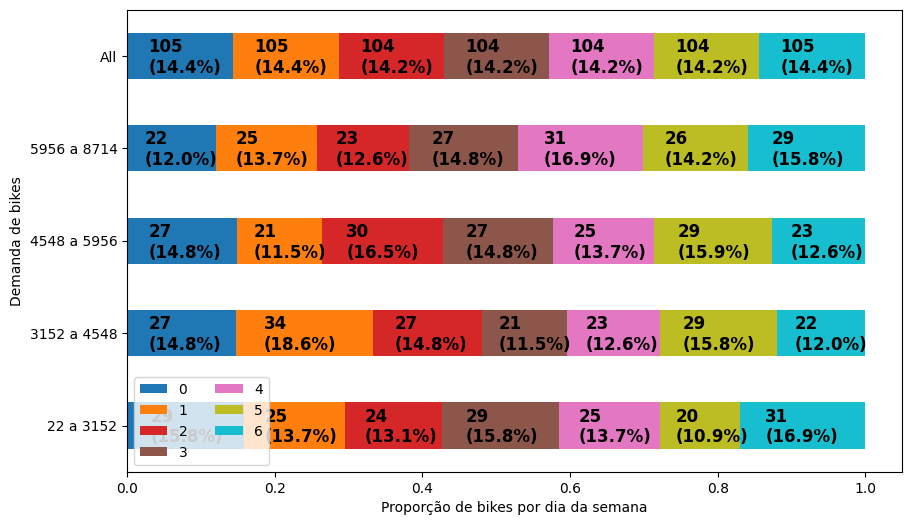

In [127]:
# gráfico 100% empilhado com label

cross_tab_prop.plot(kind='barh',
                        stacked=True,
                        colormap='tab10',
                        figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("Proporção de bikes por dia da semana")
plt.ylabel("Demanda de bikes")


for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_prop.loc[x],
                                          cross_tab.loc[x],
                                          cross_tab_prop.loc[x].cumsum()):

        plt.text(x=(y_loc - proportion) + (proportion / 5),
                 y=n - 0.18,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)',
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()